# Name: Anshul Sahu

## Tweet Emotion Recognition: Natural Language Processing with TensorFlow

---

Dataset: [Tweet Emotion Dataset](https://github.com/Anshul-Santosh-Sahu/Tweet-Emotion-Recognition-Natural-Language-Processing-with-TensorFlow/tree/main/archive)

This is a starter notebook for the guided project [Tweet Emotion Recognition with TensorFlow](https://www.coursera.org/projects/tweet-emotion-tensorflow)

A complete version of this notebook is available in the course resources

---

## Task 1: Introduction

## Task 2: Setup and Imports

1. Installing Hugging Face's nlp package
2. Importing libraries

In [2]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.0 MB/s eta 0:00:00


In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()


def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.18.0


## Task 3: Importing Data

1. Importing the Tweet Emotion dataset
2. Creating train, validation and test sets
3. Extracting tweets and labels from the examples

In [4]:
import pandas as pd

train = pd.read_csv(
    "train.txt",
    sep=";",
    names=["text","label"])

val = pd.read_csv(
    "val.txt",
    sep=";",
    names=["text","label"])

test = pd.read_csv(
    "test.txt",
    sep=";",
    names=["text","label"])

In [5]:
train.head()

,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [6]:
def get_tweet(data):
    tweets = data["text"]
    labels = data["label"]
    return tweets, labels

In [7]:
tweets, labels = get_tweet(train)
print(tweets[50]," : ", labels[50])

i need to feel the dough to make sure its just perfect  :  joy


In [8]:
def data_description(data):
    shape = data.shape
    text_nulls = data["text"].isnull().sum()
    label_nulls = data["label"].isnull().sum()
    label_count = data["label"].value_counts()

    plt.hist(data["label"])
    plt.xlabel('emotions')
    plt.ylabel('Frequency')
    plt.title('data distribution')

    print("data shape : ",shape)
    print("null values in text field : ", text_nulls)
    print("null values in text field : ", label_nulls)
    print("label counts")
    print(label_count)
    plt.show()

Training data description
data shape :  (16000, 2)
null values in text field :  0
null values in text field :  0
label counts
label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


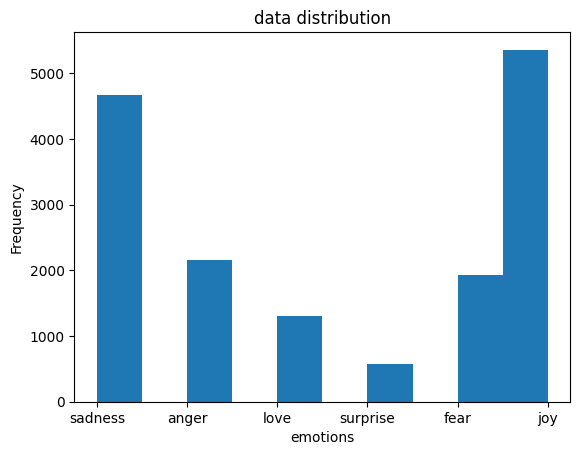

In [9]:
print("Training data description")
data_description(train)

Test data description
data shape :  (2000, 2)
null values in text field :  0
null values in text field :  0
label counts
label
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64


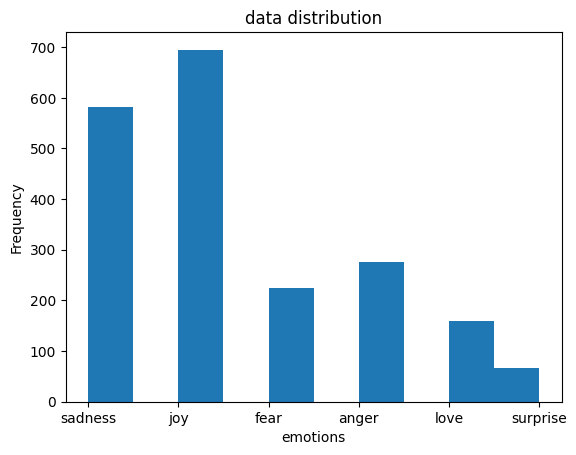

In [10]:
print("Test data description")
data_description(test)

Validation data description
data shape :  (2000, 2)
null values in text field :  0
null values in text field :  0
label counts
label
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64


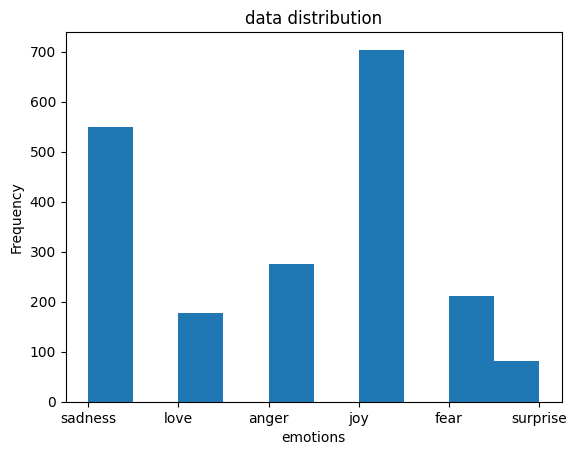

In [11]:
print("Validation data description")
data_description(val)

## Task 4: Tokenizer

1. Tokenizing the tweets

In [12]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [13]:
tokenizer = Tokenizer(num_words=10000, oov_token="<UNK>")
tokenizer.fit_on_texts(tweets)

In [14]:
print(tweets[50])
tokenizer.texts_to_sequences([tweets[50]])

i need to feel the dough to make sure its just perfect


[[2, 105, 5, 3, 6, 7419, 5, 80, 158, 79, 32, 356]]

## Task 5: Padding and Truncating Sequences

1. Checking length of the tweets
2. Creating padded sequences

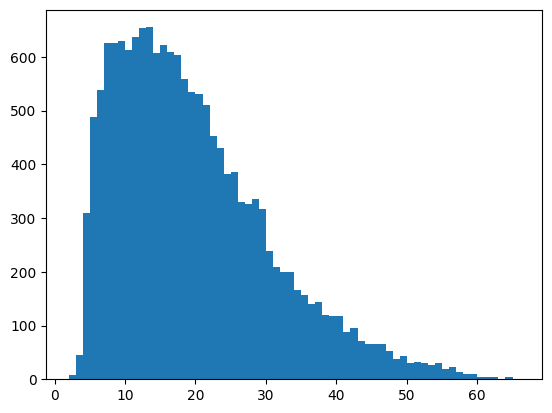

In [15]:
lengths = [len(s.split()) for s in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()

In [16]:
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [17]:
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
    return padded_sequences

In [18]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [19]:
padded_train_sequences[50]

array([   2,  105,    5,    3,    6, 7419,    5,   80,  158,   79,   32,
        356,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

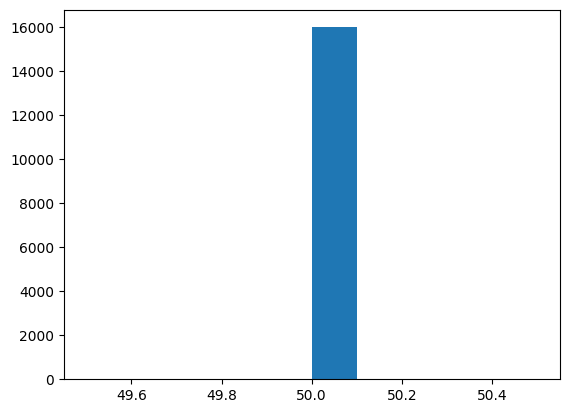

In [20]:
lengths = [len(l) for l in padded_train_sequences]
plt.hist(lengths)
plt.show()

## Task 6: Preparing the Labels

1. Creating classes to index and index to classes dictionaries
2. Converting text labels to numeric labels

In [21]:
classes = set(labels)
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [22]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((value,key) for key, value in class_to_index.items())

In [23]:
class_to_index

{'sadness': 0, 'joy': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'anger': 5}

In [24]:
index_to_class

{0: 'sadness', 1: 'joy', 2: 'love', 3: 'surprise', 4: 'fear', 5: 'anger'}

In [25]:
labels_to_ids = lambda labels : np.array([class_to_index.get(x) for x in labels])

In [26]:
ids_to_labels = lambda ids : np.array([index_to_class.get(x) for x in ids])

In [28]:
train_labels = labels_to_ids(labels)
train_labels[50]

1

## Task 7: Creating the Model

1. Creating the model
2. Compiling the model

In [31]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_3 (Bidirectional)      │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

## Task 8: Training the Model

1. Preparing a validation set
2. Training the model

In [33]:
val_tweets, val_labels = get_tweet(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = labels_to_ids(val_labels)

In [35]:
val_tweets[0], val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 0)

In [36]:
m = model.fit(
    padded_train_sequences,
    train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2)
    ]
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step - accuracy: 0.3864 - loss: 1.5320 - val_accuracy: 0.6760 - val_loss: 0.9142
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.7338 - loss: 0.7568 - val_accuracy: 0.7700 - val_loss: 0.6449
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.8625 - loss: 0.4067 - val_accuracy: 0.6880 - val_loss: 0.9255
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.9019 - loss: 0.2868 - val_accuracy: 0.8695 - val_loss: 0.3938
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9514 - loss: 0.1589 - val_accuracy: 0.8740 - val_loss: 0.4244
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9659 - loss: 0.1219 - val_accuracy: 0.8785 - val_loss: 0.4066
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9729 - loss: 0.0937 - val_accuracy: 0.8860 - val_loss: 0.4088
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - accuracy: 0.9737 - loss: 0.0798 - val_

## Task 9: Evaluating the Model

1. Visualizing training history
2. Prepraring a test set
3. A look at individual predictions on the test set
4. A look at all predictions on the test set

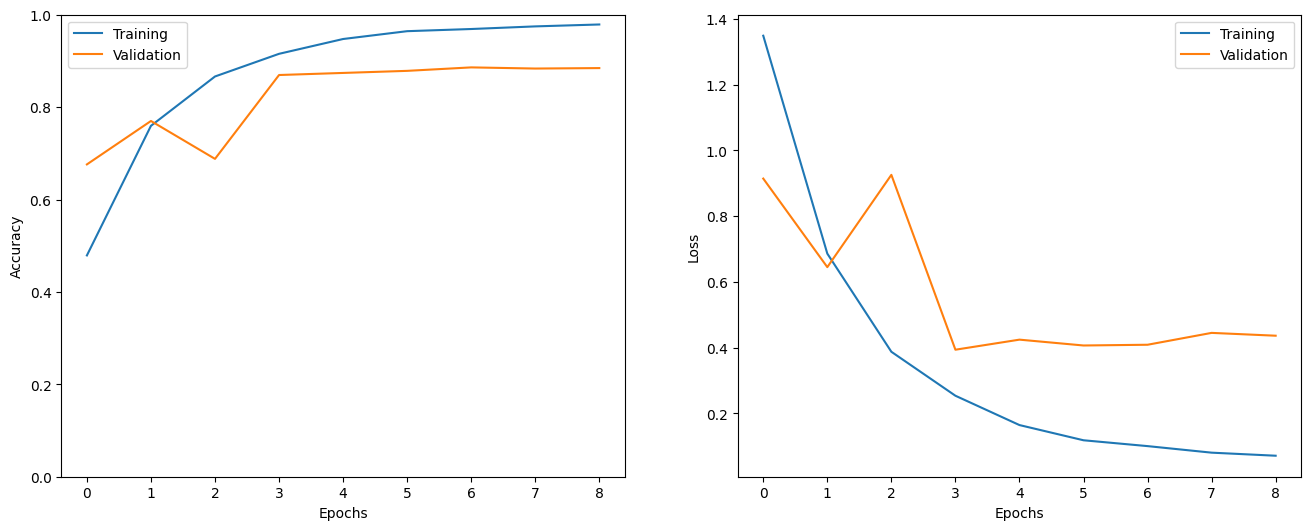

In [37]:
show_history(m)

In [38]:
test_tweets, test_labels = get_tweet(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = labels_to_ids(test_labels)

In [39]:
_ = model.evaluate(test_sequences, test_labels)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8890 - loss: 0.3994


In [40]:
i = random.randint(0, len(test_labels)-1)

print("Sentence: ", test_tweets[i])
print("Emotion: ", index_to_class[test_labels[i]])

p = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
pred_class = index_to_class[np.argmax(p).astype('uint8')]
print("Predicted Emotion: ", pred_class)

Sentence:  i feel so giggly reading your comment tags
Emotion:  joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 351ms/step
Predicted Emotion:  joy


In [41]:
for _ in range(5):
    i = random.randint(0, len(test_labels)-1)
    print("Tweet : ", test_tweets[i]," ==> label : ",index_to_class[test_labels[i]])
    p = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
    pred_class = index_to_class[np.argmax(p).astype('uint8')]
    print("predicted label : ", pred_class)
    print("-----------------------")

Tweet :  i left my garmin on my bike so i was going to have to do this by feel coming out of transition its amazing hearing cheers and your adrenaline is just going crazy  ==> label :  joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
predicted label :  anger
-----------------------
Tweet :  i stole a book from one of my all time favorite authors and now i feel like a rotten person  ==> label :  sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
predicted label :  sadness
-----------------------
Tweet :  i feel like it s waiting in the wings just patiently waiting for me to be distracted enough so it can take me down and take everything i love in this world away and destroy me  ==> label :  anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
predicted label :  anger
-----------------------
Tweet :  i feel anger i feel sad i feel joy and i feel other emotions too but will stick to a few  ==> label :  sadness
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
predicted label :  sadness
-----------------------
Tweet :  i 

In [42]:
predict_x=model.predict(test_sequences)
classes_x=np.argmax(predict_x,axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


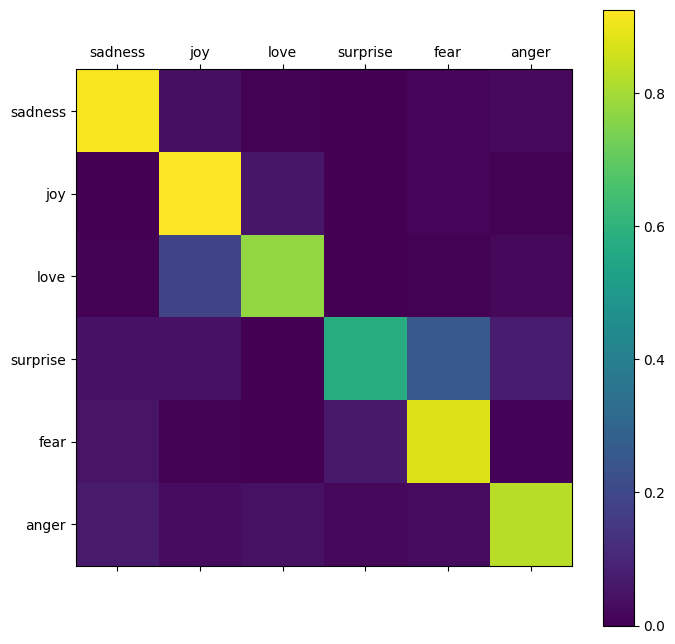

In [43]:
show_confusion_matrix(test_labels, classes_x, list(classes))